### Homework 5 (Due July 17)
Data on weekly-averaged COVID-19 cases and weekly-averaged COVID-19-related deaths in Louisiana
are provided for each of the first three “waves”. For each wave, perform a lagged cross-correlation
analysis and find the lag of peak correlation. At the lag of peak correlation perform a linear regression
to determine the slope (=deaths/case) and its standard error.
• What is the lag of peak correlation in each wave?
• What are the value and standard error of the deaths/case slope in each wave?
• Comment on any differences in these values for different waves.

In [16]:
import pandas as pd
from scipy.signal import correlate, correlation_lags
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv(r'/Users/sushovanadhikari/Desktop/start_over_workspace/hw5/first_wave.csv')
print(df)

         date  wkly avg cases  wkly avg deaths
0   3/15/2020       14.428571         0.285714
1   3/16/2020       19.285714         0.428571
2   3/17/2020       27.142857         0.571429
3   3/18/2020       38.285714         1.000000
4   3/19/2020       53.428571         1.428571
..        ...             ...              ...
80   6/3/2020      376.571429        20.285714
81   6/4/2020      394.285714        19.571429
82   6/5/2020      455.285714        20.000000
83   6/6/2020      415.571429        19.142857
84   6/7/2020      414.285714        19.857143

[85 rows x 3 columns]


In [18]:
weekly_avg_cases = df['wkly avg cases']
weekly_avg_deaths = df['wkly avg deaths']
correlation = correlate(weekly_avg_cases, weekly_avg_deaths, mode='full')
lags = correlation_lags(weekly_avg_cases.size, weekly_avg_deaths.size, mode='full')
lag = lags[np.argmax(correlation)]
print(lag)

-7


In [19]:
x,y = None,None
if lag > 0:
    x = weekly_avg_cases[:-lag]
    y = weekly_avg_deaths[lag:]
else:
    x = weekly_avg_cases[-lag:]
    y = weekly_avg_deaths[:lag]

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(f'slope: {slope}, standard error: {std_err}')

slope: -0.0011135184000567102, standard error: 0.006387664647789446


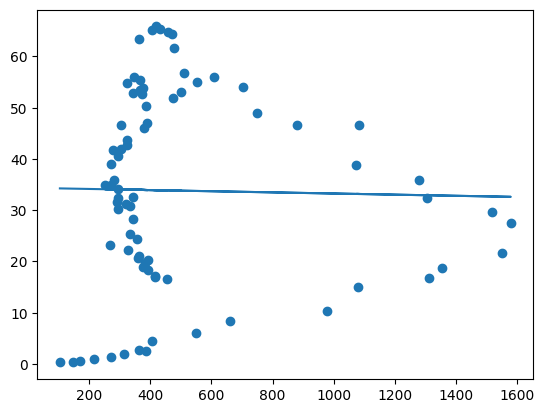

In [20]:
plt.scatter(x,y)
plt.plot(x, slope*x + intercept)
plt.show()

In [21]:
def cross_correlation(x, y):
    x = x - np.mean(x)
    y = y - np.mean(y)
    corr = np.correlate(x, y, mode='full')
    return corr

In [22]:
def linear_regression_at_peak_corr(x, y):
    corr = cross_correlation(x, y)
    peak_lag = np.argmax(corr) - len(x) + 1
    if peak_lag >= 0:
        x = x[:len(x)-peak_lag]
        y = y[peak_lag:]
    else:
        x = x[-peak_lag:]
        y = y[:len(y)+peak_lag]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, std_err

In [23]:
slope, std_err = linear_regression_at_peak_corr(x, y) 
# slope, std_err = linear_regression_at_peak_corr(weekly_avg_cases, weekly_avg_deaths)
print(f'slope:{slope}, st_err:{std_err}')

slope:-0.049412328715237354, st_err:0.004794493968043158


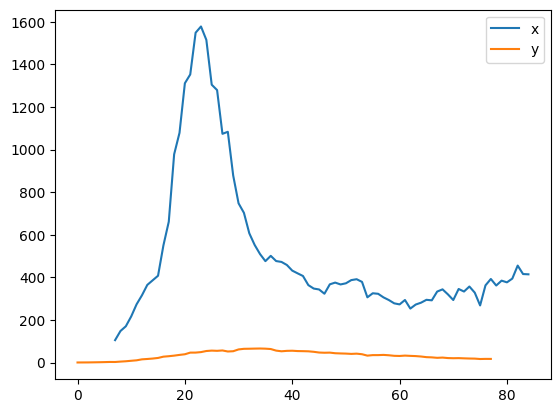

In [25]:
def plot_signals(x, y):
    corr = cross_correlation(x, y)
    peak_lag = np.argmax(corr) - len(x) + 1
    if peak_lag >= 0:
        x = x[:len(x)-peak_lag]
        y = y[peak_lag:]
    else:
        x = x[-peak_lag:]
        y = y[:len(y)+peak_lag]
    plt.plot(x, label='x')
    plt.plot(y, label='y')
    plt.legend()
    plt.show()

# Example usage:
plot_signals(weekly_avg_cases, weekly_avg_deaths)